In [117]:
'''

#### RETAIL DATA LAB : 1ST LESSON ###

#### CALENDAR (TENTATIVE)

h. 9.30 - 12.00
Thursday Oct 15
Thursday Oct 29
Thursday Nov 12
Thursday Nov 26
Thursday Dec 10


#### OBJECTIVE: to give the students the idea of how much data mining/data cleaning/machine learning/data visualization
are important in retail decisions (marketing offline in store / online)

#### CONTENTS
- Oney Data and the Datasharing Platform project: computation and visualization 
- Customers segmentation and Customer Relationship Management
- Transactional data management
- Data visualization tools and examples 
- Basket Analysis, Association Rules, Cannibalization, Promotions, Assortments : how to monetize the data ?


####################################################################################################################
####################################################################################################################
####################################################################################################################
####################################################################################################################




######################################## F I R S T    L E S S O N ##################################################

1) Presentations & Prerequisites 
•             Basic knowledge of (R/) Python & Jupyter Notebooks
•             Basic knowledge of SQL and Relational DB
•             Interest in Innovation and Retail

2) Expectations from the students
3) Contact: filippo.manfroni@oney.it for any questions
4) Who is Oney Data ?
5) Market Basket Analysis in PYTHON: Introduction


####################################################################################################################
####################################################################################################################
######################################## Market Basket Analysis in Python ##########################################
####################################################################################################################
####################################################################################################################

OBJECTIVES:

1) Identify patterns in consumer decision-making with the mlxtend package.
2) Use metrics to evaluate the properties of patterns.
3) Construct "rules" that provide concrete recommendations for businesses.
4) Visualize patterns and rules using seaborn and matplotlib.


OUR DATASET:
We'll use a dataset from a Brazilian ecommerce site (olist.com) that is divided into three CSV files:

olist_order_items_dataset.csv
olist_products_dataset.csv
product_category_name_translation.csv

'''

'\n\n#### RETAIL DATA LAB : 1ST LESSON ###\n\n#### CALENDAR (TENTATIVE)\n\nh. 9.30 - 12.00\nThursday Oct 15\nThursday Oct 29\nThursday Nov 12\nThursday Nov 26\nThursday Dec 10\n\n\n#### OBJECTIVE: to give the students the idea of how much data mining/data cleaning/machine learning/data visualization\nare important in retail decisions (marketing offline in store / online)\n\n#### CONTENTS\n- Oney Data and the Datasharing Platform project: computation and visualization \n- Customers segmentation and Customer Relationship Management\n- Transactional data management\n- Basket Analysis, Association Rules, Cannibalization, Promotions, Assortments : how to monetize the data ?\n\n\n####################################################################################################################\n####################################################################################################################\n\n######################################## F I R S T    L E S S O N #############

In [1]:
# Import modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default asthetic parameters.
# sns.set()

# Define path to data.
data_path = 'https://github.com/datacamp/Market-Basket-Analysis-in-python-live-training/raw/master/data/'

In [2]:
orders = pd.read_csv(data_path+'olist_order_items_dataset.csv')

# Load products items dataset.
products = pd.read_csv(data_path+'olist_products_dataset.csv')

# Load translations dataset.
translations = pd.read_csv(data_path+'product_category_name_translation.csv')

In [ ]:
# Search for NA
# Replace NA with...fillna()

In [6]:
orders.head()

,order_id,order_item_id,product_id,price
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9


In [ ]:
# mean_expense, median_expense, any Na
# which other variables could be useful for us? (customers & segmentations, date, quantities, hierarchy of products, promotions, )
# which kpis do you think we will/can compute easily?


In [7]:
'''#### olist_order_items_dataset.csv: ###

order_id: The unique identifier for a transaction.
order_item_id: The order of an item within a transaction.
product_id: The unique identifier for a product.
price: The product's price.

'''

"#### olist_order_items_dataset.csv: ###\n\norder_id: The unique identifier for a transaction.\norder_item_id: The order of an item within a transaction.\nproduct_id: The unique identifier for a product.\nprice: The product's price.\n\n"

In [8]:
products.head()

# let's find info about product: mean volume, and so on

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0


In [ ]:
'''
### olist_products_dataset.csv:

product_id: The unique identifier for a product.
product_category_name: The name of an item's product category in Portuguese.
product_weight_g: The product's weight in grams.
product_length_cm: The product's length in centimeters.
product_width_cm: The product's width in centimeters.
product_height_cm: The product's height in centimeters.
'''

In [9]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [115]:
# let's split the name of the product category in a new dataframe 

translations_split = translations['product_category_name_english'].apply(lambda x: x.split('_') )

### ASSIGNMENT: Find the most frequent substrings in the column of lists, and rank them

In [ ]:
'''
### product_category_name_translation.csv:

product_category_name: The name of an item's product category in Portuguese.
product_category_name_english: The name of an item's product category in English. '''

In [10]:
# Print info about our datasets
orders.info()

# products.info()

# translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
order_id         112650 non-null object
order_item_id    112650 non-null int64
product_id       112650 non-null object
price            112650 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


In [13]:
### TRANSLATIONS OF PRODUCT NAMES ###
'''
The product names are given in Portuguese.

We'll translate the names of categories to English using the pandas DataFrame named translations.
1) .merge() performs a join operation on columns or indices.
2) *on* is the column on which to perform the join.
3) *how* specifies which keys to use to perform the join. '''

# Translate product names to English.

products = products.merge(translations, on='product_category_name', how="left")


# Print the new products dataset with English names.
products.head()

,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,16.0,10.0,14.0,perfume
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,625.0,20.0,17.0,13.0,housewares


In [14]:
'''
### MAPPING PRODUCT IDs TO PRODUCT CATEGORY NAMES, WHICH ARE AVAILABLE IN PRODUCTS ###

Observation: using category names will also simplify the analysis, since there are fewer categories than products.'''

# Define product category name in orders DataFrame.
orders = orders.merge(products[['product_id','product_category_name_english']], on='product_id', how='left')

In [15]:
orders.head()

,order_id,order_item_id,product_id,price,product_category_name_english
0,b8bfa12431142333a0c84802f9529d87,1,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.3,NaN
2,b8bfa12431142333a0c84802f9529d87,3,765a8070ece0f1383d0f5faf913dfb9b,81.0,sports_leisure
3,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff
4,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,239.9,pet_shop


In [16]:
# Is there any product without a defined category? 
orders[orders['product_category_name_english'].isna()]

,order_id,order_item_id,product_id,price,product_category_name_english
1,b8bfa12431142333a0c84802f9529d87,2,a41e356c76fab66334f36de622ecbd3a,99.30,NaN
126,0046e1d57f4c07c8c92ab26be8c3dfc0,1,ff6caf9340512b8bf6d2a2a6df032cfa,7.79,NaN
128,00482f2670787292280e0a8153d82467,1,a9c404971d1a5b1cbc2e4070e02731fd,7.60,NaN
135,004f5d8f238e8908e6864b874eda3391,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,NaN
145,0057199db02d1a5ef41bacbf41f8f63b,1,41eee23c25f7a574dfaf8d5c151dbb12,20.30,NaN
...,...,...,...,...,...
112306,ff24fec69b7f3d30f9dc1ab3aee7c179,1,5a848e4ab52fd5445cdc07aab1c40e48,122.99,NaN
112333,ff3024474be86400847879103757d1fd,1,f9b1795281ce51b1cf39ef6d101ae8ab,39.90,NaN
112350,ff3a45ee744a7c1f8096d2e72c1a23e4,1,b61d1388a17e3f547d2bc218df02335b,139.00,NaN
112438,ff7b636282b98e0aa524264b295ed928,1,431df35e52c10451171d8037482eeb43,49.90,NaN


In [ ]:
# Drop products without a defined category.
orders.dropna(inplace=True, subset=['product_category_name_english'])

In [ ]:
# NUMBER OF UNIQUE ITEMS.
len(orders['product_id'].unique())

In [ ]:
# NUMBER OF UNIQUE CATEGORIES.
len(orders['product_category_name_english'].unique())

In [ ]:
### LET'S MAKE SOME AGGREGATIONS ###

# OBJECTIVE: reduces the number of potential itemsets from 2^{32328} to 2^{71} !
# METHOD: construct ***transactions*** from order and product data
# STEPS: 1) DEFINITION: a transaction consists of the unique items purchased by a customer.
#        2) Need to extract transactions from orders.
#        3) Group all items in an order.

In [17]:
### LET'S MAKE AN EXAMPLE:

# Identify transactions (only the categories present in this transaction)
example1 = orders[orders['order_id'] == 'fe64170e936bc5f6a6a41def260984b9']['product_category_name_english']

example1

111984     bed_bath_table
111985    furniture_decor
Name: product_category_name_english, dtype: object

In [18]:
# Identify transactions associated with example order.
example2 = orders[orders['order_id'] == 'fffb9224b6fc7c43ebb0904318b10b5f']['product_category_name_english']

example2

112640    watches_gifts
112641    watches_gifts
112642    watches_gifts
112643    watches_gifts
Name: product_category_name_english, dtype: object

In [54]:
# I want to create a LIST of the categories which are present in each transaction
# we will use the method *** .unique() ***
transactions = orders.groupby("order_id").product_category_name_english.unique()

pd.options.display.max_rows = 999
# Print transactions header.
transactions.head(100)

order_id
00010242fe8c5a6d1ba2dd792cb16214                         [cool_stuff]
00018f77f2f0320c557190d7a144bdd3                           [pet_shop]
000229ec398224ef6ca0657da4fc703e                    [furniture_decor]
00024acbcdf0a6daa1e931b038114c75                            [perfume]
00042b26cf59d7ce69dfabb4e55b4fd9                       [garden_tools]
00048cc3ae777c65dbb7d2a0634bc1ea                         [housewares]
00054e8431b9d7675808bcb819fb4a32                          [telephony]
000576fe39319847cbb9d288c5617fa6                       [garden_tools]
0005a1a1728c9d785b8e2b08b904576c                      [health_beauty]
0005f50442cb953dcd1d21e1fb923495                    [books_technical]
00061f2a7bc09da83e415a52dc8a4af1                      [health_beauty]
00063b381e2406b52ad429470734ebd5           [fashion_bags_accessories]
0006ec9db01a64e59a68b2c340bf65a7                     [bed_bath_table]
0008288aa423d2a3f00fcb17cd7d8719                       [garden_tools]
00097923114

In [31]:
# Let's count the distinct categories present in each transaction, and print the maximum
transactions_qty_cat = orders.groupby("order_id")['product_category_name_english'].nunique().reset_index()
#transactions_qty_cat.max()

In [36]:
transactions_qty_cat.columns

Index(['order_id', 'product_category_name_english'], dtype='object')

In [39]:
# Let's identify the transactions which categories number is =3:
transactions_qty_cat[transactions_qty_cat['product_category_name_english'] ==3]

# Let's check which are the categories for these transactions:
##### ASSIGNMENT ######

,order_id,product_category_name_english
11231,1d23106803c48c391366ff224513fb7f,3
12244,1fcbc88015c88c1a14d4b8ec35ea8ed7,3
18227,2f8f31eb2f7b6572836d662a6625c8e4,3
18489,3040863957c9336e7389512584639bb5,3
18557,306b4ec62d908535f2bfa2877665e899,3
38020,62ce4e3989a3477928510bb4d1064cc4,3
45702,76c4c846aae2dae9e87dfa492c3f5259,3
53796,8c2b13adf3f377c8f2b06b04321b0925,3
55847,91be51c856a90d7efe86cf9d082d6ae3,3
65100,a98012aa8c697f2bcff9f8c2183e0f2b,3


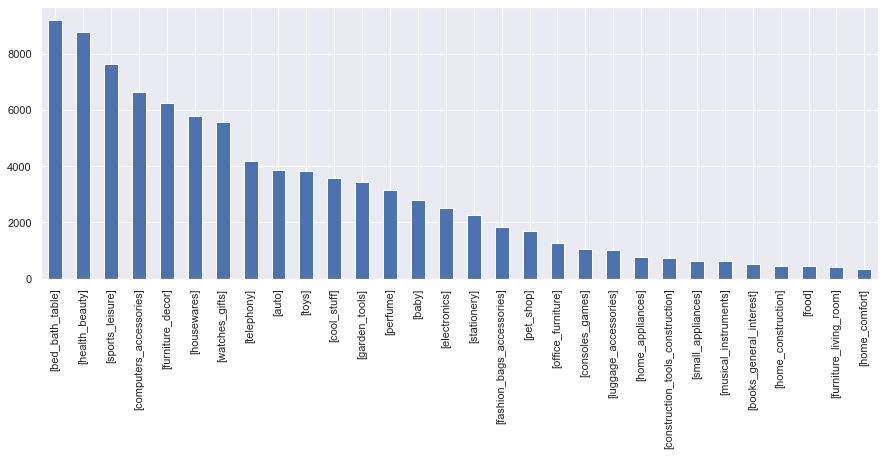

In [41]:
# Let's PLOT which are the first 30 SETS OF CATEGORIES with the largest number of transactions
# we use the .value_counts() method to count the transactions for each set of categories

transactions.value_counts()[:30].plot(kind='bar', figsize=(15,5))

In [ ]:
'''
Insight 1: The most common itemsets consist of a SINGLE CATEGORY.
Insight 2: There's a long tail of categories that consist of INFREQUENTLY PURCHASED CATEGORIES.'''

### ASSIGNMENT: Check the quantiles() for the distribution of categories/transactions
### ASSIGNMENT: Find other insights with graphical analysis

In [44]:
# Convert the pandas series to list of lists.
transactions = transactions.tolist()

# Print length of transactions.
len(transactions)

[array(['cool_stuff'], dtype=object),
 array(['pet_shop'], dtype=object),
 array(['furniture_decor'], dtype=object),
 array(['perfume'], dtype=object),
 array(['garden_tools'], dtype=object),
 array(['housewares'], dtype=object),
 array(['telephony'], dtype=object),
 array(['garden_tools'], dtype=object),
 array(['health_beauty'], dtype=object),
 array(['books_technical'], dtype=object),
 array(['health_beauty'], dtype=object),
 array(['fashion_bags_accessories'], dtype=object),
 array(['bed_bath_table'], dtype=object),
 array(['garden_tools'], dtype=object),
 array(['sports_leisure'], dtype=object),
 array(['consoles_games'], dtype=object),
 array(['perfume'], dtype=object),
 array(['sports_leisure'], dtype=object),
 array(['cool_stuff'], dtype=object),
 array(['bed_bath_table'], dtype=object),
 array(['telephony'], dtype=object),
 array(['office_furniture'], dtype=object),
 array(['fashion_bags_accessories'], dtype=object),
 array(['cool_stuff'], dtype=object),
 array(['sports_leisur

In [45]:
# Count number of unique item categories for each transaction.
counts = [len(transaction) for transaction in transactions]

In [46]:
# median number of items in a transaction.
np.median(counts)

1.0

In [ ]:
# maximum number of items in a transaction.
np.max(counts)

In [ ]:
### ASSOCIATION RULE ###
### Association rule: an "if-then" relationship between two ***itemsets***.

''' EXAMPLE OF A RULE 

rule: if {coffee) then {milk}.
antecedent: coffee
consequent: milk

'''

### METRIC: A MEASURE OF THE STRENGHT OF AN ASSOCIATION RULE

'''
***SUPPORT*** : measures the frequency with which an itemset appears in a database of transactions.
             
                support(X) = (number of transactions containing X)/(total number of transactions)    for an itemset X

A high support value indicates that items in an itemset are purchased TOGETHER FREQUENTLY; so they are associated.

OBSERVATION: support({antecedent, subsequent}) = support({subsequent, antecedent})



***CONFIDENCE*** : Conditional probability of the consequent, given the antecedent.

               confidence(antecedent -> consequent)= support(antecedent, consequent)/support(antecedent)

A high value of confidence indicates that the antecedent and consequent are associated and that
the direction of the association runs from the antecedent to the consequent.




'''

## TO MAKE SOME PRACTICE WITH THE CALCULATION OF SUPPORT & CONFIDENCE

# https://infocenter.informationbuilders.com/wf80/index.jsp?topic=%2Fpubdocs%2FRStat16%2Fsource%2Ftopic49.htm
          
    